<a href="https://colab.research.google.com/github/Ruthuvikas/Stress-tweet-detection/blob/main/Stress_tweet_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!unzip -o /content/drive/MyDrive/Xdata/archive.zip

Archive:  /content/drive/MyDrive/Xdata/archive.zip
  inflating: Reddit_Combi.csv        
  inflating: Reddit_Title.csv        
  inflating: Twitter_ Non-Advert-Tabelle 1.csv  
  inflating: Twitter_Full.csv        


In [38]:
import pandas as pd

USECOLS = ['text', 'labels']
df = pd.read_csv(filepath_or_buffer='Twitter_Full.csv', sep=';', usecols=USECOLS)
df.head()


,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0


In [39]:
df.columns

Index(['text', 'labels'], dtype='object')

In [40]:
df

,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0
...,...,...
8895,Thank you for all your business questions toda...,0
8896,Who is planning on walking their minds today?!...,1
8897,no mobile phones Three Tips to Reduce Technos...,1
8898,purple heart Day 1 purple heart But vets firs...,1


In [41]:
df['text'][0]

'Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired'

In [42]:
df['text'][2]

'Wishing YOU Peace Joy & Love! JoyTrain MentalHealth Quote Mindfulness GoldenHearts IAM ChooseLove IAmChoosingLove TuesdayMorning TuesdayThoughts TuesdayMotivation RT '

In [43]:
df['text'].fillna("", inplace=True)

In [44]:
import pandas as pd
import tensorflow_hub as hub
from tqdm import tqdm

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to convert tweets to vectors
def tweet_to_vector(tweet):
    return embed([tweet])[0].numpy()

# Convert each tweet to a vector and store the result
vectors = []
for tweet in tqdm(df['text'], desc="Converting tweets to vectors"):
    vector = tweet_to_vector(tweet)
    vectors.append(vector)

# Option 1: Store vectors in a new DataFrame column
df['tweet_vectors'] = vectors



Converting tweets to vectors: 100%|██████████| 8900/8900 [00:39<00:00, 225.65it/s]


In [45]:
df['tweet_vectors']

0       [0.05283811, -0.08590957, 0.04215441, 0.017693...
1       [-0.0037022003, 0.0072014355, -0.02259598, 0.0...
2       [0.08475753, -0.07600954, -0.042283405, 0.0377...
3       [0.024447342, -0.05977322, -0.050316926, -0.02...
4       [-0.002654642, -0.07114219, -0.047089737, -0.0...
                              ...                        
8895    [-0.04786226, 0.0075260308, -0.012790812, -0.0...
8896    [-0.0267528, 0.00047889937, 0.039825298, -0.03...
8897    [-0.054867502, 0.004924008, 0.023037918, -0.04...
8898    [-0.05440314, -0.057027712, 0.017296702, -0.01...
8899    [0.056354567, 0.038590323, 0.022392513, -0.006...
Name: tweet_vectors, Length: 8900, dtype: object

In [46]:
df.head()

,text,labels,tweet_vectors
0,Being s mom is cleaning 24/7 the same shit ove...,1,"[0.05283811, -0.08590957, 0.04215441, 0.017693..."
1,And now we have been given the walkthru book b...,0,"[-0.0037022003, 0.0072014355, -0.02259598, 0.0..."
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,"[0.08475753, -0.07600954, -0.042283405, 0.0377..."
3,speak-no-evil monkey Can I Be Honest With You...,1,"[0.024447342, -0.05977322, -0.050316926, -0.02..."
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,"[-0.002654642, -0.07114219, -0.047089737, -0.0..."


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df['tweet_vectors'].tolist())
y = df['labels']

X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8301860910137983

SVM

In [49]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.8291765966286898

Neural network

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [51]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (1 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (2 classes of iris flowers)
  def __init__(self, in_features= 512, h1=20, h2=20, h3 = 20, h4 = 20, out_features=2):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.out = nn.Linear(h4, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [52]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [55]:
X_train

tensor([[-0.0582, -0.0516,  0.0523,  ..., -0.0465,  0.0331, -0.0035],
        [-0.0151,  0.0070,  0.0439,  ...,  0.0823, -0.0191, -0.0074],
        [ 0.0244, -0.0848, -0.0391,  ...,  0.0298, -0.0671,  0.0538],
        ...,
        [ 0.0489, -0.0608,  0.0482,  ...,  0.0440, -0.0614, -0.0546],
        [-0.0485, -0.0904,  0.0370,  ...,  0.0044, -0.0362, -0.0143],
        [ 0.0463,  0.0274,  0.0566,  ...,  0.0334,  0.0824,  0.0138]])

In [56]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [57]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.7051963806152344
Epoch: 10 and loss: 0.49273157119750977
Epoch: 20 and loss: 0.4008212983608246
Epoch: 30 and loss: 0.37560418248176575
Epoch: 40 and loss: 0.36043545603752136
Epoch: 50 and loss: 0.34090936183929443
Epoch: 60 and loss: 0.3154521584510803
Epoch: 70 and loss: 0.28571879863739014
Epoch: 80 and loss: 0.25470930337905884
Epoch: 90 and loss: 0.22716446220874786
Epoch: 100 and loss: 0.20252908766269684
Epoch: 110 and loss: 0.18017366528511047
Epoch: 120 and loss: 0.15941374003887177
Epoch: 130 and loss: 0.1449599713087082
Epoch: 140 and loss: 0.1263011395931244
Epoch: 150 and loss: 0.11066436022520065
Epoch: 160 and loss: 0.09600529074668884
Epoch: 170 and loss: 0.08320269733667374
Epoch: 180 and loss: 0.07185828685760498
Epoch: 190 and loss: 0.06213409826159477
Epoch: 200 and loss: 0.053069792687892914
Epoch: 210 and loss: 0.045250263065099716
Epoch: 220 and loss: 0.0381477028131485
Epoch: 230 and loss: 0.0330280102789402
Epoch: 240 and loss: 0.029101802

Text(0.5, 0, 'Epoch')

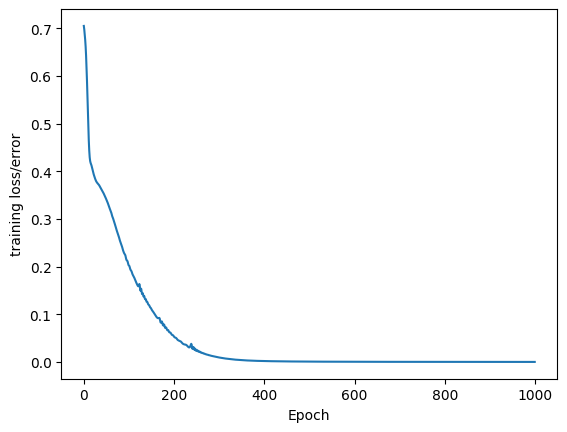

In [59]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("training loss/error")
plt.xlabel('Epoch')

In [60]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [61]:
loss

tensor(3.5388)

In [62]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "No stress"
    elif y_test[i] == 1:
      x = 'Stress'

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

We got 1406 correct!


In [63]:
accuracy = correct / len(X_test) * 100
print('accuracy: ', accuracy)

accuracy:  78.98876404494382


Zero Shot learning

In [64]:
!pip install transformers

from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

sequence = "Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired"
labels = ["suicide", "fire", "police", "medical"]

classifier(sequence, labels)

{'sequence': 'Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired',
 'labels': ['fire', 'medical', 'police', 'suicide'],
 'scores': [0.6853125095367432,
  0.13718979060649872,
  0.09948094934225082,
  0.07801684737205505]}

In [65]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline with a specified model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# The fixed sequence
sequence = "speak-no-evil monkey Can I Be Honest With You? globe showing Europe-Africa telephone 03453192666 e-mail clinic.co.uk therapy help NLP CBT hypnotherapy mentalhealth Hertfordshire anxiety stress depression confidence counselling"

# Fixed labels
labels = ["suicide", "fire", "police", "medical", "childcare", "mentalhealth", "war"]

# Custom hypothesis template
custom_template = "This text is about {}."

# Perform classification with the custom hypothesis template
results = classifier(sequence, labels, hypothesis_template=custom_template)
print(results)


{'sequence': 'speak-no-evil monkey Can I Be Honest With You? globe showing Europe-Africa telephone 03453192666 e-mail clinic.co.uk therapy help NLP CBT hypnotherapy mentalhealth Hertfordshire anxiety stress depression confidence counselling', 'labels': ['mentalhealth', 'medical', 'fire', 'police', 'war', 'childcare', 'suicide'], 'scores': [0.8659102916717529, 0.07597605884075165, 0.013995932415127754, 0.01229437068104744, 0.01199360005557537, 0.01093376986682415, 0.008895988576114178]}


In [66]:
df

,text,labels,tweet_vectors
0,Being s mom is cleaning 24/7 the same shit ove...,1,"[0.05283811, -0.08590957, 0.04215441, 0.017693..."
1,And now we have been given the walkthru book b...,0,"[-0.0037022003, 0.0072014355, -0.02259598, 0.0..."
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,"[0.08475753, -0.07600954, -0.042283405, 0.0377..."
3,speak-no-evil monkey Can I Be Honest With You...,1,"[0.024447342, -0.05977322, -0.050316926, -0.02..."
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,"[-0.002654642, -0.07114219, -0.047089737, -0.0..."
...,...,...,...
8895,Thank you for all your business questions toda...,0,"[-0.04786226, 0.0075260308, -0.012790812, -0.0..."
8896,Who is planning on walking their minds today?!...,1,"[-0.0267528, 0.00047889937, 0.039825298, -0.03..."
8897,no mobile phones Three Tips to Reduce Technos...,1,"[-0.054867502, 0.004924008, 0.023037918, -0.04..."
8898,purple heart Day 1 purple heart But vets firs...,1,"[-0.05440314, -0.057027712, 0.017296702, -0.01..."


In [67]:
df['text'][3]

' speak-no-evil monkey Can I Be Honest With You? globe showing Europe-Africa telephone 03453192666 e-mail clinic.co.uk therapy help NLP CBT hypnotherapy mentalhealth Hertfordshire anxiety stress depression confidence counselling'